In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
def rg(positions):
    posnp = np.array(positions)
    rmean = [posnp[:,0].mean(0), posnp[:,1].mean(0), posnp[:,2].mean(0)]
    rmean = np.array(rmean)
    rg = 0
    for pos in positions:
        rg+= (pos[0] - rmean[0])**2 + (pos[1] - rmean[1])**2 + (pos[2] - rmean[2])**2
    return math.sqrt(rg/len(positions))

In [3]:
n = 448
bond_length = 3.8
steps = 500000

In [4]:
positions = np.zeros(shape=(n,3))
x = 0
for pos in range(n):
    positions[pos][0] = 3.8*pos

In [5]:
rgs = []
for step in range(steps):
    r_pos = random.randrange(n)
    rx = np.random.normal(0,1,1)[0]
    ry = np.random.normal(0,1,1)[0]
    rz = np.random.normal(0,1,1)[0]
    r = np.sqrt(rx*rx+ry*ry+rz*rz)
    rx = rx/r
    ry = ry/r
    rz = rz/r
    for mods in range(r_pos,n):
        positions[mods][0] = positions[mods-1][0] + rx
        positions[mods][1] = positions[mods-1][1] + ry
        positions[mods][2] = positions[mods-1][2] + rz
    rgs.append(rg(positions))

In [6]:
print(rgs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



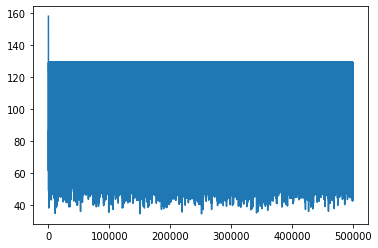

In [7]:
plt.plot(np.linspace(0,steps,steps,endpoint=True), rgs)